# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup_object = soup(html, "html.parser")

In [5]:
# Extract all rows of data
table = mars_soup_object.find(class_ = 'table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list for headers and confirm that all headers have been captured
headers = []
table_headers = table.find_all('th')
for x in table_headers:
    title=x.text
    headers.append(title)
headers


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Loop through the scraped data to create a list of rows
all_rows = table.find_all('tr', class_ = 'data-row')
data = []
for x in all_rows:
    td = x.find_all('td')
    rows = [x.text for x in td]
    data.append(rows)
data    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
datatype = mars_df.dtypes
datatype

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
mars_df['id']=mars_df['id'].astype(int)
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol']=mars_df['sol'].astype(int)
mars_df['ls']=mars_df['ls'].astype(int)
mars_df['month']=mars_df['month'].astype(int)
mars_df['min_temp']=mars_df['min_temp'].astype(float)
mars_df['pressure']=mars_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
mars_months

12

In [12]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
mars_months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
mars_days = mars_df['sol'].nunique()
mars_days

1867

In [18]:
# 3. What is the average low temperature by month?
monthly_avglow_temp = mars_df.groupby('month')['min_temp'].mean()
monthly_avglow_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [19]:
# 3. What is the average low temperature by month?
monthly_low = mars_df.groupby('month').mean()
monthly_temp = monthly_low['min_temp']
monthly_low


,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,1013.873563,2015-08-17 18:53:47.586206976,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,2015-11-26 18:12:08.089887744,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,2015-12-26 02:30:00.000000000,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,2016-02-05 07:32:47.010309376,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,2015-12-03 19:19:43.892617472,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,2014-09-16 01:18:22.040816384,750.829932,164.897959,-75.299320,745.054422
7,714.549296,2014-08-10 08:16:54.084507136,715.105634,194.894366,-72.281690,795.105634
8,718.078014,2014-10-31 18:53:37.021276672,795.333333,224.347518,-68.382979,873.829787
9,785.843284,2015-01-07 11:06:16.119403008,861.186567,254.052239,-69.171642,913.305970


<function matplotlib.pyplot.show(close=None, block=None)>

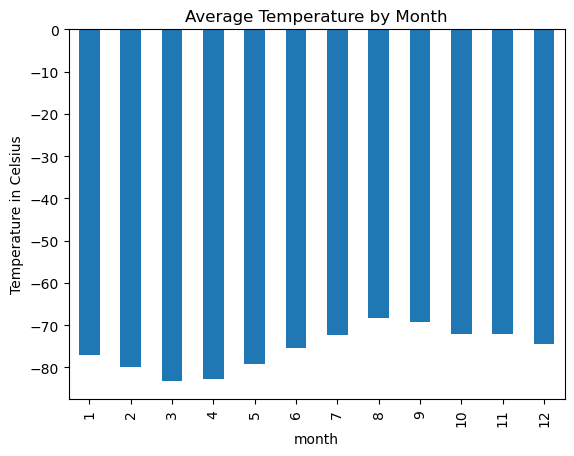

In [20]:
# Plot the average temperature by month
monthly_avglow_temp.plot.bar()
plt.ylabel('Temperature in Celsius')
plt.title('Average Temperature by Month')
plt.show

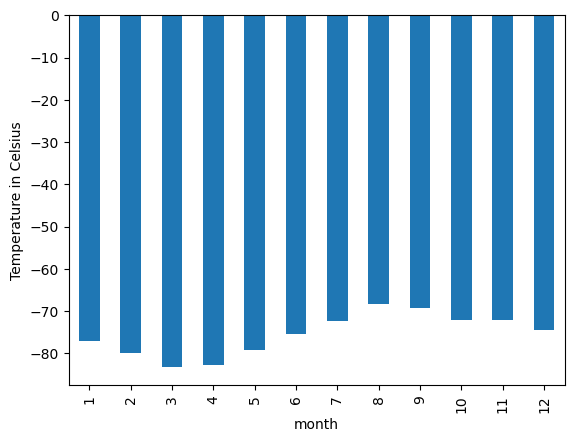

In [15]:
# Plot the average temperature by month
monthly_avglow_temp.plot.bar()
plt.ylabel('Temperature in Celsius')
plt.title('Average Temperature by Month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

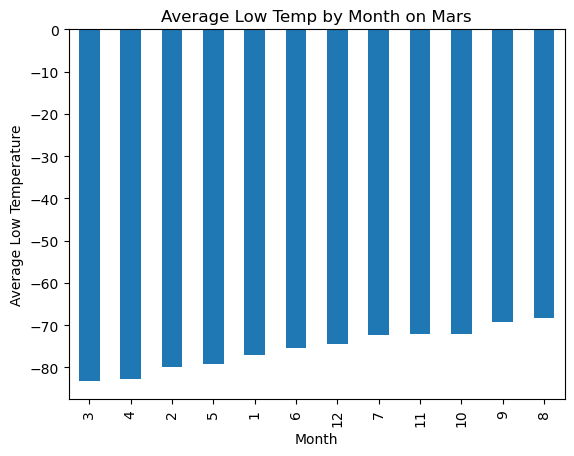

In [21]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avglow_temp = monthly_avglow_temp.sort_values()
monthly_avglow_temp.plot(kind='bar', xlabel = 'Month', ylabel='Average Low Temperature')
plt.title('Average Low Temp by Month on Mars')
plt.show

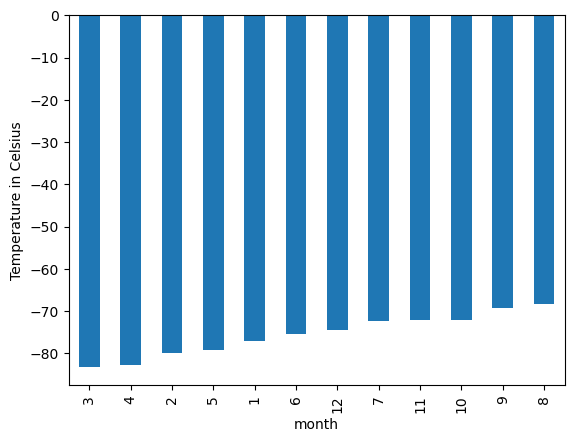

In [16]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avglow_temp = monthly_avglow_temp.sort_values()
monthly_avglow_temp.plot(kind='bar', xlabel = 'Month', ylabel='Average Low Temperature')
plt.title('Average Low Temp by Month on Mars')
plt.show

In [22]:
# 4. Average pressure by Martian month
average_pressure_monthly = mars_df.groupby('month')['pressure'].mean()
average_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

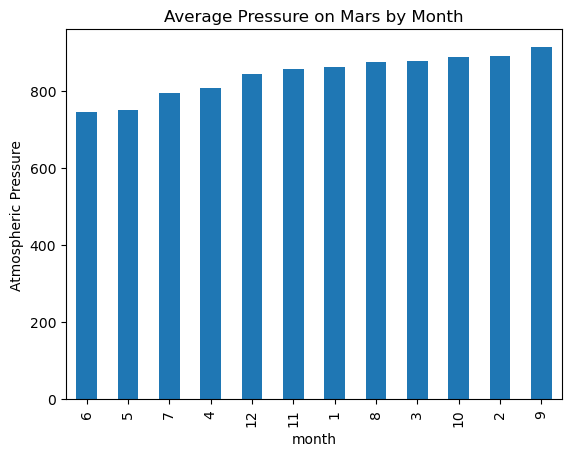

In [25]:
# Plot the average pressure by month
average_pressure_monthly = average_pressure_monthly
average_pressure_monthly.plot(kind='bar', xlabel='month', ylabel = 'Atmospheric Pressure')
plt.title('Average Pressure on Mars by Month')
plt.show()

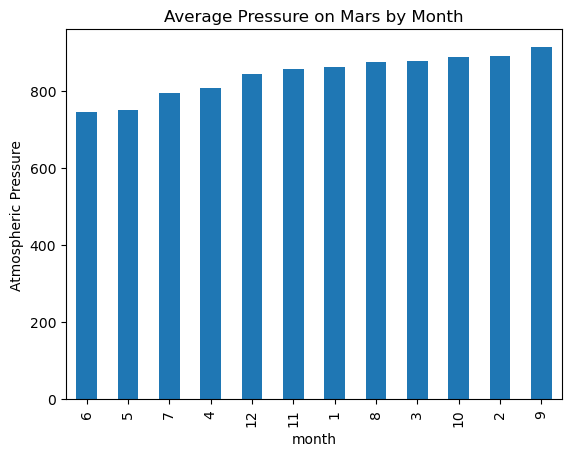

In [23]:
# Plot the average pressure by month
average_pressure_monthly = average_pressure_monthly.sort_values()
average_pressure_monthly.plot(kind='bar', xlabel='month', ylabel = 'Atmospheric Pressure')
plt.title('Average Pressure on Mars by Month')
plt.show()

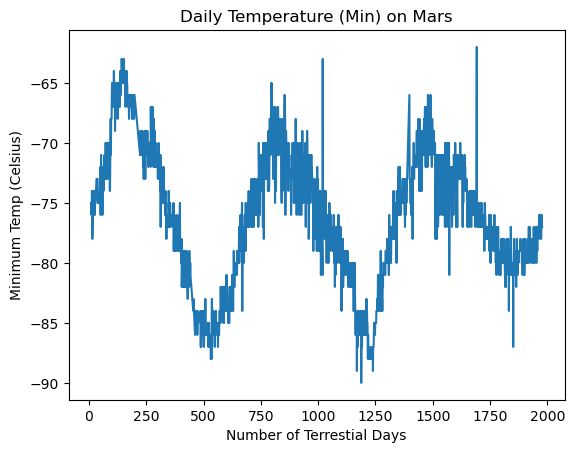

In [27]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of Terrestial Days')
plt.ylabel('Minimum Temp (Celsius)')
plt.title('Daily Temperature (Min) on Mars')
plt.show()

I sorted the temperature data to determine/confirm that Mars' 3rd month has the lowest minimum temp and the warmest temperatures occur in Mars' 8th month.

Atmospheric pressure is lowest in the 6th month and highest, according to the sorted values in the chart above is in Mars' 9th month.

When observing the weather patterns it appears that the data captures 2-3 weather cycles.  For instance, looking from trough to trough in the first full weather cycle is a way to approximate the average year.  The first trough occurs approximately on day 515 and the second period of low temperature is 1215. This allows me to approximate that the number of terrestrial days is aproximately 700, according to the internet this is pretty close as the martian year is estimated to be 687 days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV

mars_df.to_csv('mars_table.csv',index=False)

In [21]:
browser.quit()